# Problem definition and the approached solution 

The orginal problem(policy) is I have 3 supervisors who are checking if the assigned experiments were done by the 3 labs ( lab 1, lab2 , and lab 3) when the 3 supervisors pass every 2 hours all the days, meaning that 12 visits are the max number of visits per day. However, the problem is passing every 2 hours results in finding some of the labs are either already done and are waiting or other labs are still finishing their assigned experiments. And the labs cannot be assigned another experiment unless they already done of their preivous assigned experiment. My policy was to generate random numbers, which follow an exponential distribution in terms of a matrix of a dimention of (12*3). As 12  refers to the # of supervisors' visits and 3 refers to # of labs represented in the data frame named as df. After that, to solve the problem that some laps will not have finished when the supervisors come, their needed left time will be shifted to the following column. Whereas, the already done labs will be assigned a new experiment to finish. I used the bootstrapping technique to examine which is the ideal time for the 3 supervisiors to pass by the labs. By taking the 75th percentile, I am suggesting that at least 2 of the labs will be finished when the superviors pass every during the most repeative time in minutes and this is my policy .

In [1]:
pip install datascience 


Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd 
import numpy as np 
import random 
import plotly.graph_objects as go
import matplotlib.pyplot as plot
from datascience import*

/opt/anaconda3/lib/python3.7/site-packages/datascience/tables.py:17: MatplotlibDeprecationWarning:

The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.

/opt/anaconda3/lib/python3.7/site-packages/datascience/util.py:10: MatplotlibDeprecationWarning:

The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.



In [2]:
df = pd.DataFrame(np.zeros((12, 3)),columns =["lab1", "lab2" , "lab3"])
df # first creating a table contanining the 3 labs a matrix of size 12*3 and first assign zeros and then 
# I will over-write the new generated values over it. 

,lab1,lab2,lab3
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
5,0.0,0.0,0.0
6,0.0,0.0,0.0
7,0.0,0.0,0.0
8,0.0,0.0,0.0
9,0.0,0.0,0.0


In [3]:
for lab in df.columns:
    sum = 0
    for visits in range(0,12):# conditing that the number of visits are at max 12 
        x = np.random.exponential(scale = 100.0, size = 1)# generating the random tests taken times in terms of assigning random variable that follow exponetial function 
        while x > 1440:
            x = np.random.exponential(scale = 100.0, size = 1)
        if sum + x < 1440: # here giving a condition not to exceed 24 hours represnted in the equivalent minutes
            sum += x 
            df.at[visits, lab] = int(x)# to display every test taken numbers per each lab
        else:
            break 

In [4]:
def shift(labs, lab, row, policy): # in this code, if there is any time left to finish the experiment after the 
# adviosrs come,this time left will be shifted to the coulmn after to continue working on the experiment rather than 
# starting from all over again. 
    df1 = labs.at[row, lab] - policy 
    row = row + 1
    print("debugging")
    while row < len(labs):
        print(row)
        df1 = labs.at[row, lab]
        labs.at[row, lab] = df2
        df1= df2
        row = row + 1
    return labs

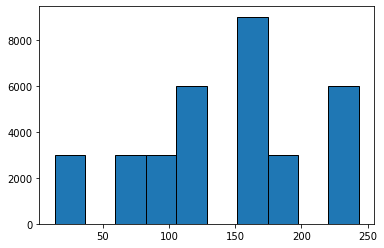

[243.5 153.5 167.5 ... 152.   63.   13.5]


In [5]:
percentiles = [] # here I am doing bootstrappping technique to exiamne which time is ideal for the advisiors to pass 
# by the labs 
for i in np.arange(3000): # doing an iteration over 3000
    sample_df = df.sample(12)# taking all the table's values as a sample by selecting the size of 12
    for i in range(0,11): # here by passing the values from 0 to 11, I am computing the 75th percentile of every row across the 3 labs 
        percentile = df.iloc[i].quantile(0.75) # to compute the 75th percentile 
        percentiles = np.append(percentiles, percentile)# appending all the 75th percentile together
plot.hist([percentiles])# vislualizing the data more to see which one of ideal time is the most frequent 
plot.show() # from the plot show, I am examining the most repeative ideal time for supervisors to pass by the labs
print(percentiles) 